<a href="https://colab.research.google.com/github/ByeongKeun/Industrial-AI/blob/master/2021_1_%EB%94%A5%EB%9F%AC%EB%8B%9D%EC%8B%A4%EC%A0%9C/%EA%B3%BC%EC%A0%9C/2021_0531_13%EC%A3%BC%EC%B0%A8-CNNvsLENET5/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

11493376/11490434 [==============================] - 0s 0us/step
Epoch 1/12
469/469 - 141s - loss: 0.2304 - accuracy: 0.9293 - val_loss: 0.0489 - val_accuracy: 0.9834
Epoch 2/12
469/469 - 139s - loss: 0.0801 - accuracy: 0.9761 - val_loss: 0.0324 - val_accuracy: 0.9887
Epoch 3/12
469/469 - 138s - loss: 0.0616 - accuracy: 0.9813 - val_loss: 0.0319 - val_accuracy: 0.9900
Epoch 4/12
469/469 - 139s - loss: 0.0520 - accuracy: 0.9842 - val_loss: 0.0335 - val_accuracy: 0.9889
Epoch 5/12
469/469 - 138s - loss: 0.0447 - accuracy: 0.9859 - val_loss: 0.0280 - val_accuracy: 0.9905
Epoch 6/12
469/469 - 139s - loss: 0.0363 - accuracy: 0.9888 - val_loss: 0.0290 - val_accuracy: 0.9909
Epoch 7/12
469/469 - 139s - loss: 0.0329 - accuracy: 0.9897 - val_loss: 0.0261 - val_accuracy: 0.9915
Epoch 8/12
469/469 - 138s - loss: 0.0306 - accuracy: 0.9897 - val_loss: 0.0232 - val_accuracy: 0.9925
Epoch 9/12
469/469 - 138s - loss: 0.0289 - accuracy: 0.9907 - val_loss: 0.0280 - val_accuracy: 0.9916
Epoch 10/12
469/4

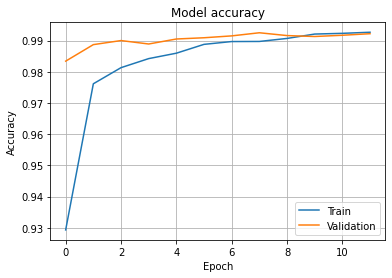

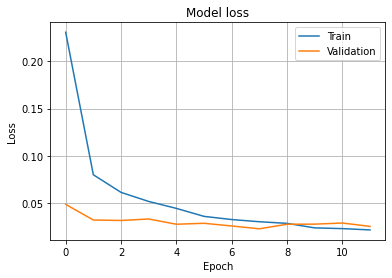

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam

# MNIST 데이터셋을 읽고 신경망에 입력할 형태로 변환
(x_train,y_train),(x_test,y_test)=mnist.load_data()
x_train=x_train.reshape(60000,28,28,1)
x_test=x_test.reshape(10000,28,28,1)
x_train=x_train.astype(np.float32)/255.0
x_test=x_test.astype(np.float32)/255.0
y_train=tf.keras.utils.to_categorical(y_train,10)
y_test=tf.keras.utils.to_categorical(y_test,10)

# 신경망 모델 설계
cnn=Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1))) # Input(28 * 28) → ①Conv층: Filter Size 32, 커널(마스크) size 3*3, 활성화 함수 = relu
cnn.add(Conv2D(64,(3,3),activation='relu')) #②Conv층: Filter 64, 커널 3*3, 활성화 함수 = relu
cnn.add(MaxPooling2D(pool_size=(2,2)))  #③ Pooling층: 해상도를 절반으로 낮춤
cnn.add(Dropout(0.25))  #Overfitting방지를 위해 Dropout(Random으로 연결된 노드를 끊음) 25%의 노드만 연결
cnn.add(Flatten())  #1차원 배열로 flatten
#FC층을 Dense layer로 효율화 함: 감소된 차원의 Feature(특징) Map들만 Input으로 하여 Output과 완전연결 계층을 생성
cnn.add(Dense(128,activation='relu')) #④ FC(DENSE) 층: size 128, 활성화 함수 relu
cnn.add(Dropout(0.5))  #Overfitting방지를 위해 Dropout(Random으로 연결된 노드를 끊음) 50%의 노드만 연결
cnn.add(Dense(10,activation='softmax')) #⑤ FC(DENSE) 층: size 10, 활성화 함수 softmax

# 신경망 모델 학습
cnn.compile(loss='categorical_crossentropy',optimizer=Adam(),metrics=['accuracy'])
hist=cnn.fit(x_train,y_train,batch_size=128,epochs=12,validation_data=(x_test,y_test),verbose=2)

# 신경망 모델 정확률 평가
res=cnn.evaluate(x_test,y_test,verbose=0)
print("정확률은",res[1]*100)

import matplotlib.pyplot as plt

# 정확률 그래프
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()

# 손실 함수 그래프
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train','Validation'], loc='best')
plt.grid()
plt.show()